### Bike Sharing Assignment

### Problem Statement:
#### A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.
#### Essentially the company wants :

* To understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19, by creating a linear model.
* To identify the variables affecting their revenues i.e. Which variables are significant in predicting the demand for shared bikes.
* To know the accuracy of the model, i.e. How well those variables describe the bike demands
##### They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

#### Reading and Understanding the data

In [4]:
#### importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



In [5]:
df= pd.read_csv("day.csv")
df.head() 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df = df.rename(columns={'dteday': 'date'}) #renaming

In [7]:
df.head() 

,instant,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# instant : A unique identifier for each record or observation.

#### inspecting the data

In [10]:
df.shape

(730, 16)

In [11]:
df.columns

Index(['instant', 'date', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   date        730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [13]:
#All columns have non-null values, with a mix of integer, float, and object data types.

In [14]:
df.describe() #to generate summary statistics 

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [15]:
### checking duplicates 
df1= df.copy()
df1.shape  # no duplicate found

(730, 16)

#### decoding

In [17]:
# decoding these columns: season,yr,mnth,holiday,weekday,workingday	 and weathersit.

In [18]:
df.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [19]:
def ass_season(x):
    if x==1:
        return"spring"
    elif x==2:
        return"summer"
    elif x==3:
        return"fall"
    else:
        return "winter"
df["season"]= df["season"].apply(ass_season)


In [20]:
df.head()

,instant,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [21]:
df.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [22]:
df.yr.value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [23]:
def ass_year(x):
    if x==0:
        return "2018"
    else:
        return" 2019"
df.yr=df.yr.apply(ass_year)        

In [24]:
df.head()

,instant,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [25]:
df.yr.value_counts()

yr
2018     365
 2019    365
Name: count, dtype: int64

In [26]:
df.mnth.value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [27]:
#assigning string values to different months instead of numeric values which may misindicate some order to it
def object_map(x):
    return x.map({
        1:"Jan",
        2: "Feb",
        3:"Mar",
        4: "April",
        5: "May",
        6: "June",
        7: "July",
        8: "Aug",
        9: "Sep",
        10: "Oct",
        11: "Nov",
        
        12: "Dec"
    })
#applying the function to the two columns

df['mnth'] = object_map(df['mnth'])


In [28]:
df.mnth.value_counts()

mnth
Jan      62
Mar      62
May      62
July     62
Aug      62
Oct      62
Dec      62
April    60
June     60
Sep      60
Nov      60
Feb      56
Name: count, dtype: int64

In [29]:
df.holiday.value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [30]:
def ass_holiday(x):
    if x==0:
        return "No"
    else:
        return "Yes"
df.holiday= df.holiday.apply(ass_holiday)        
        

In [31]:
df.holiday.value_counts()

holiday
No     709
Yes     21
Name: count, dtype: int64

In [32]:
df.weekday.value_counts()

weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64

In [33]:
def ass_weekday(x):
    return {1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat',0:'sun'}.get(x, x)

df['weekday'] = df['weekday'].apply(ass_weekday)


In [34]:
df.weekday.value_counts()

weekday
mon    105
tue    105
wed    104
thu    104
fri    104
sat    104
sun    104
Name: count, dtype: int64

In [35]:
df.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [36]:
def ass_weathersit(x):
    if x==1:
        return "Clear"
    elif x==2:
        return "Mist"
    elif x==3:
        return "Light snow"
    else:
        return "Heavy rain"
df['weathersit']= df['weathersit'].apply(ass_weathersit)        

In [37]:
df.weathersit.value_counts()

weathersit
Clear         463
Mist          246
Light snow     21
Name: count, dtype: int64

In [38]:

df.head()

,instant,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,No,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,No,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,No,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,No,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,No,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Dropping redundant columns 

#### based on the look at the data and data dictionary. The following columns can be removed 
* instant: A unique identifier for each record or observation. We already have default index value.
* date : because we already have separate year and month column.
*  casual and registered beacuse i have another column cnt which is total of both.


In [41]:
df.columns

Index(['instant', 'date', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [42]:
df.drop(['instant','date','casual','registered'], axis=1, inplace= True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 68.6+ KB


In [44]:
df.dtypes

season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [45]:
### Checking outliers

In [46]:
df.describe()

,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [47]:
df.describe(include=['object'])

,season,yr,mnth,holiday,weekday,weathersit
count,730,730,730,730,730,730
unique,4,2,12,2,7,3
top,fall,2018,Jan,No,mon,Clear
freq,188,365,62,709,105,463


In [48]:
df['season'].value_counts(normalize=True) * 100


season
fall      25.753425
summer    25.205479
spring    24.657534
winter    24.383562
Name: proportion, dtype: float64

In [49]:
df.season.describe()

count      730
unique       4
top       fall
freq       188
Name: season, dtype: object

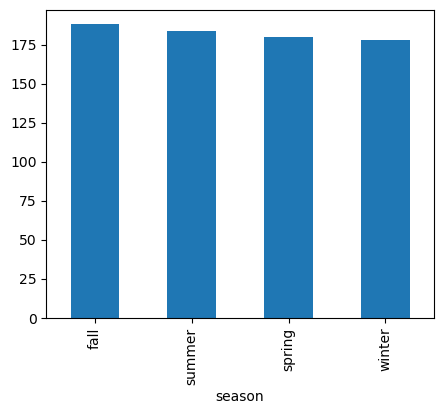

In [50]:
plt.figure(figsize=[5,4])
df['season'].value_counts().plot(kind='bar')
plt.show()

In [51]:
df.season.mode()

0    fall
Name: season, dtype: object

#### Handling outliers

In [53]:
def searchoutliers(data, column):
    Q1 = data[column].quantile(0.25) #This calculates the 1st quantile of the data in the specified column. 
    Q3 = data[column].quantile(0.75) #This calculates the 3rd quantile of the data in the specified column. 
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR #This calculates the lower bound for detecting outliers. It is 1.5 times the IQR below Q1.
    upper_bound = Q3 + 1.5 * IQR #This calculates the upper bound for detecting outliers. It is 1.5 times the IQR above Q3.
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

windspeed_outliers = searchoutliers(df, 'windspeed')
hum_outliers = searchoutliers(df, 'hum')

In [54]:
df_no_outliers = df[~df.index.isin(windspeed_outliers.index)]
df_no_outliers = df_no_outliers[~df_no_outliers.index.isin(hum_outliers.index)]

In [55]:
median_windspeed = df['windspeed'].median()
df.loc[windspeed_outliers.index, 'windspeed'] = median_windspeed

In [56]:
median_hum = df['hum'].median()
df.loc[hum_outliers.index, 'hum'] = median_hum

### Visualising the data 

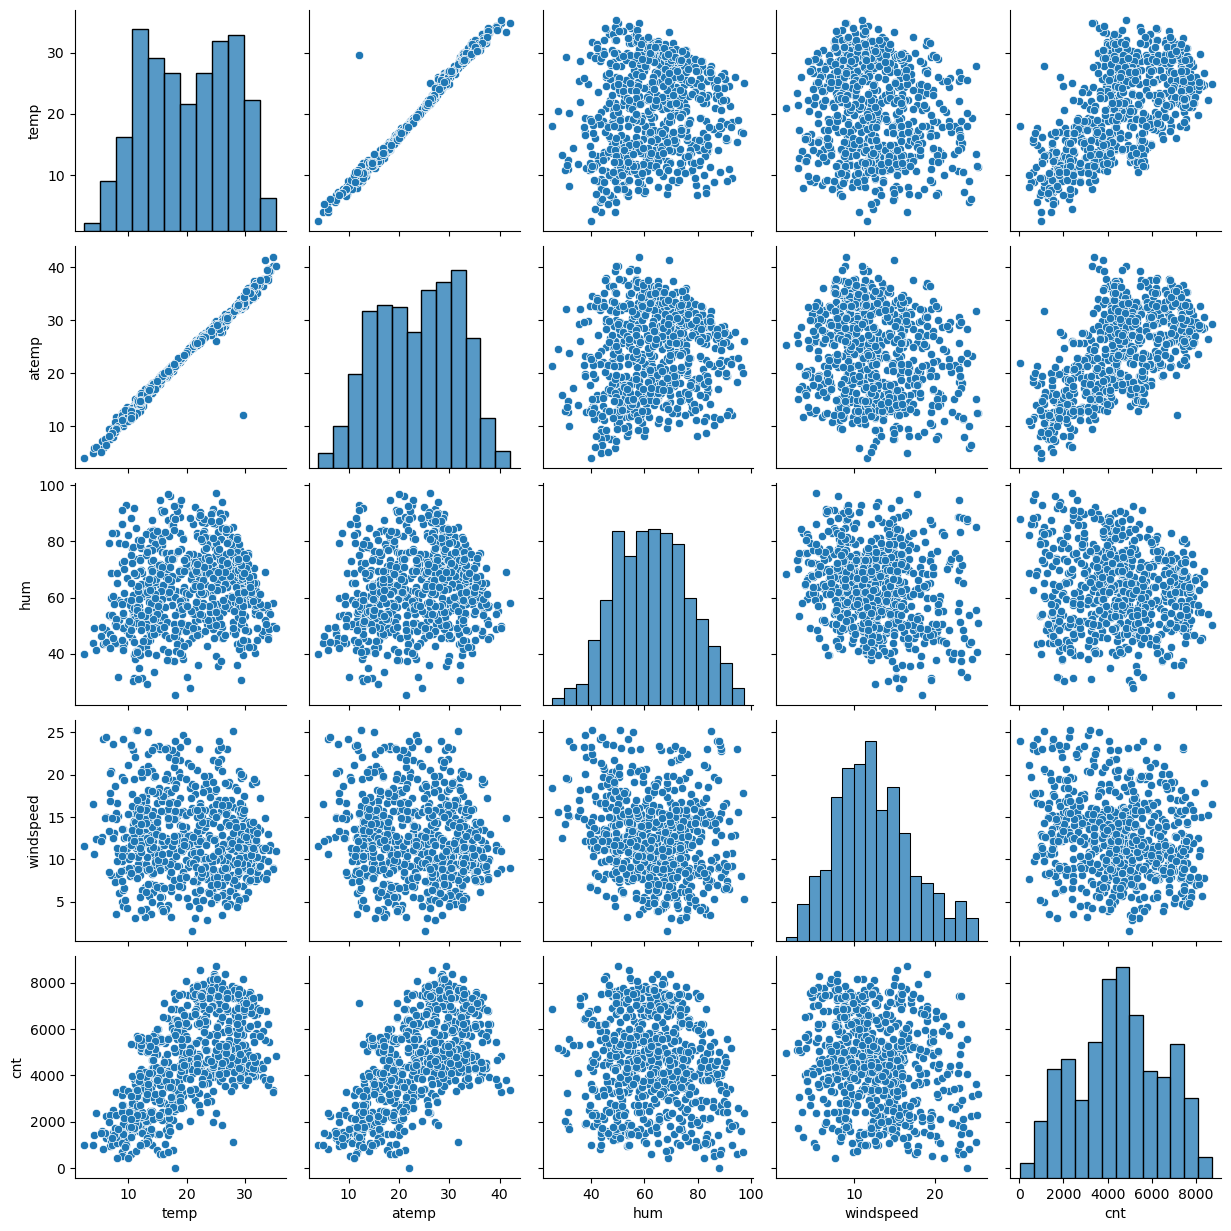

In [58]:
#plotting visualisation for numerical column
sns.pairplot(data=df,vars=['temp','atemp','hum','windspeed','cnt']) #using cnt which is total of casual and registered.
plt.show()

In [59]:
#The above Pair-Plot tells us that with the target variable 'cnt' -- 'temp','atemp' have Linear relation.

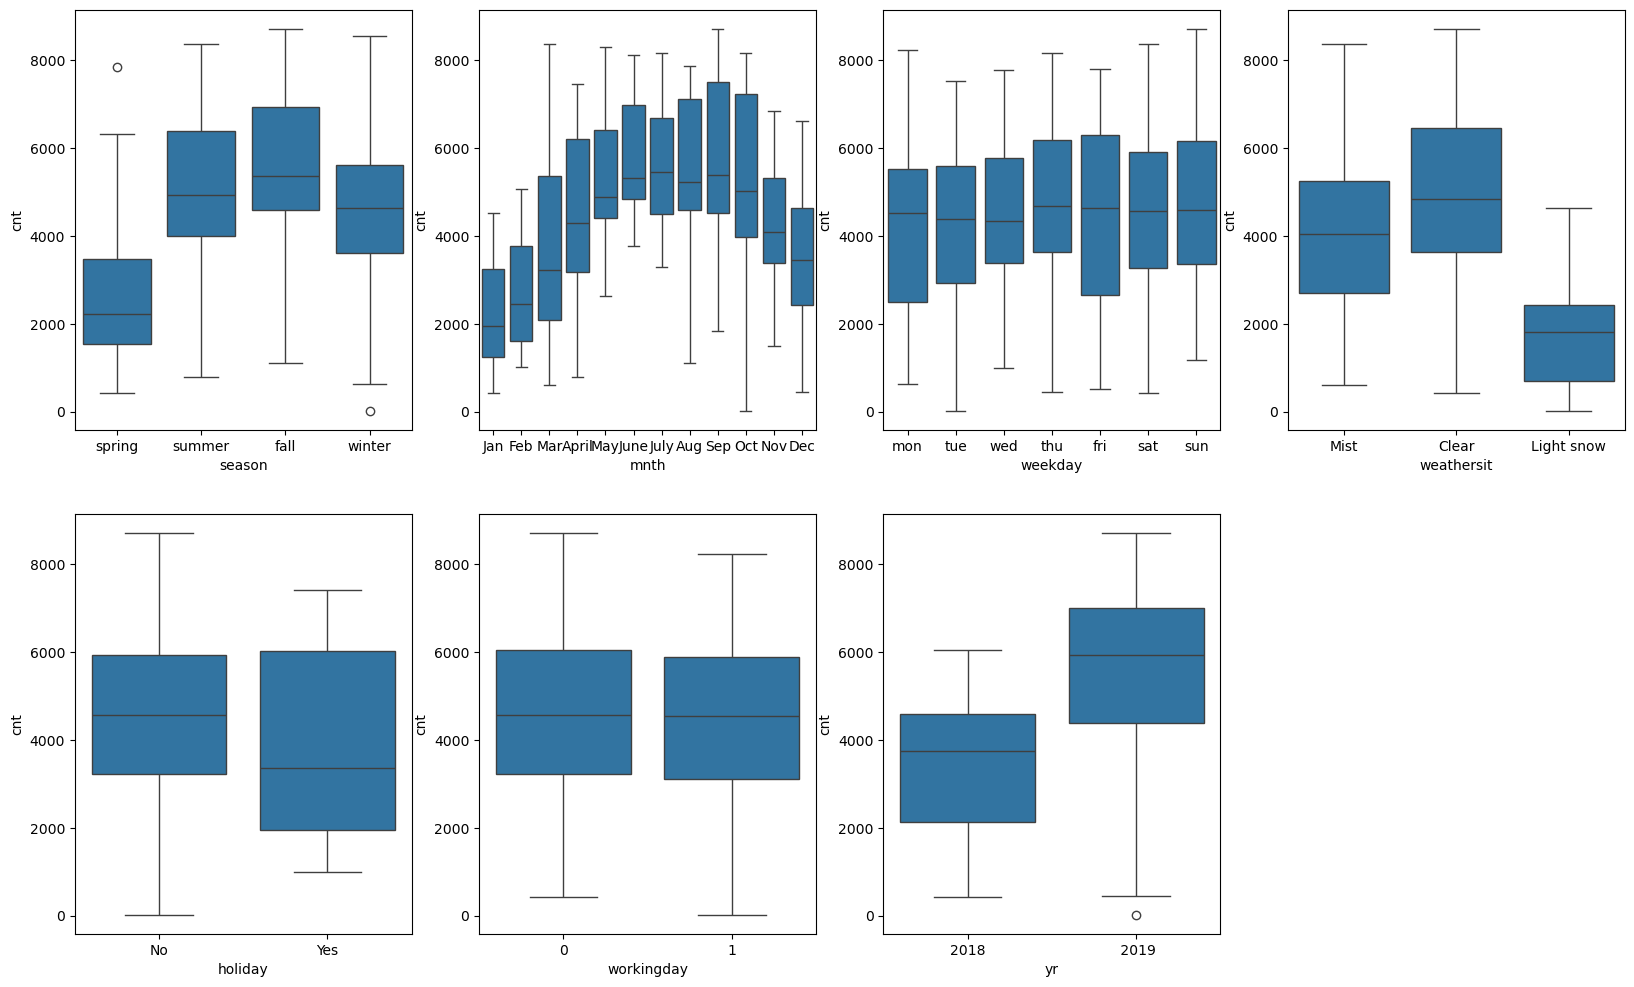

In [60]:
#visualisation for categorical column---bivariate analysis
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

#### conclusion
* for the variable season the category 3 i.e fall has highest median and maximum demand of bikes was seen in this season, whereas least was seen for category 1.
* the count of bikes is highest in the month of September. Intersetingly, the medium of june-august,july-september is almost same.
* there is no big difference in the demand of bike throughout the week.
* for the category 1 i.e clear weather in weathersit column, the median and the demand of bike is high. Most people rented the bike in clear weather.
* Whether it is a holiday or a workingday, it has no big impact on rental bikes.
* the demand of bike is high in 2019.

##### correlation matrix

In [63]:
corr_matrix= df[['temp','atemp','hum','windspeed','cnt']].corr()
corr_matrix

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.125354,-0.139424,0.627044
atemp,0.991696,1.000000,0.138864,-0.164667,0.630685
hum,0.125354,0.138864,1.000000,-0.200778,-0.119319
windspeed,-0.139424,-0.164667,-0.200778,1.000000,-0.216045
cnt,0.627044,0.630685,-0.119319,-0.216045,1.000000


In [64]:
#higher humidity slightly reduces the count
# higher windspeeds are somewhat associated with a decrease in the rental bikes but again this relationship is not very strong.

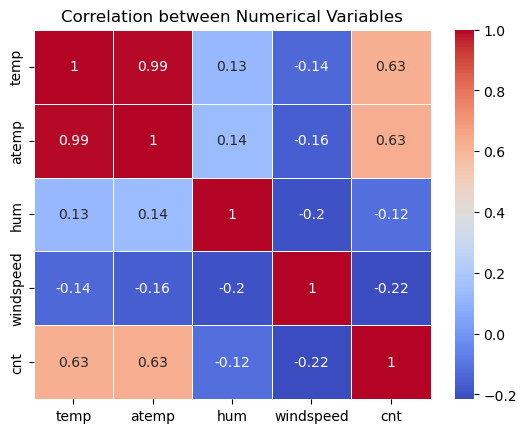

In [65]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation between Numerical Variables")
plt.show()

In [66]:
#cnt is positively correlated with temp and atemp and it is negatively correlated with windspeed and hum

## data preparation

In [68]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,No,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,No,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,No,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,No,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,No,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [69]:
df.shape

(730, 12)

In [70]:
df.dtypes

season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [71]:
df_categorical = df.select_dtypes(include='object')
df_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit'], dtype='object')

In [72]:
df_dummies = pd.get_dummies(df_categorical, drop_first = True, dtype= "int") #by default datatype is boolean
df_dummies.head()  
# drops the first category of each categorical variable to avoid multicollinearity.By doing this, only n-1 dummy variables are created for a 
# categorical column with n unique categories, instead of n dummy variables.

,season_spring,season_summer,season_winter,yr_2018,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,...,mnth_Sep,holiday_Yes,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light snow,weathersit_Mist
0,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df.drop(columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit'],  axis =1, inplace=True)

In [74]:
#concatenate dummy variable with original dataframe
df_new = pd.concat([df, df_dummies], axis=1)
pd.set_option('display.max_columns',29)
df_new.head()

,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2018,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,...,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_Yes,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light snow,weathersit_Mist
0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
df_new.dtypes

workingday                 int64
temp                     float64
atemp                    float64
hum                      float64
windspeed                float64
cnt                        int64
season_spring              int32
season_summer              int32
season_winter              int32
yr_2018                    int32
mnth_Aug                   int32
mnth_Dec                   int32
mnth_Feb                   int32
mnth_Jan                   int32
mnth_July                  int32
mnth_June                  int32
mnth_Mar                   int32
mnth_May                   int32
mnth_Nov                   int32
mnth_Oct                   int32
mnth_Sep                   int32
holiday_Yes                int32
weekday_mon                int32
weekday_sat                int32
weekday_sun                int32
weekday_thu                int32
weekday_tue                int32
weekday_wed                int32
weathersit_Light snow      int32
weathersit_Mist            int32
dtype: obj

In [76]:
len(df_new.columns)

30

## scaling

In [78]:
#minmaxscaler
scaler = MinMaxScaler()

In [79]:
#apply scaler to all the columns except yes-no and dummy variables

In [80]:
var=['temp','hum','windspeed','atemp','cnt']
df_new[var]=scaler.fit_transform(df_new[var])

## Model building and evaluation

In [82]:
# first step is the usual test-train split

In [83]:
# creating X and y
X = df_new
y = df_new.pop('cnt')

In [84]:
#dividing data into testing and training set
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [85]:
X_train.shape

(510, 29)

In [86]:
X_test.shape

(220, 29)

In [87]:
y_train.shape

(510,)

In [88]:
y_test.shape

(220,)

In [89]:
X_train.head()

,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2018,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_Yes,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light snow,weathersit_Mist
576,1,0.815169,0.766351,0.626450,0.402099,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,0,0.442393,0.438975,0.511021,0.389882,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0.245101,0.200348,0.319025,0.923102,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,0,0.395666,0.391735,0.327725,0.302441,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
111,0,0.345824,0.318819,0.661832,0.554176,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [90]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [91]:
X_train.columns

Index(['workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'yr_2018', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'holiday_Yes',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Light snow',
       'weathersit_Mist'],
      dtype='object')

#### building the model

In [93]:
lm = LinearRegression() #This line creates an instance of the LinearRegression class, which will later be used to fit the data and make predictions.
lm.fit(X_train, y_train) #fits the linear regression model to the training data.
rfe = RFE(estimator= lm, n_features_to_select=15) #initializes Recursive Feature Elimination to perform feature selection.        
rfe = rfe.fit(X_train, y_train) #fits the RFE model to the training data and performs the feature selection.

In [94]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 7),
 ('season_winter', True, 1),
 ('yr_2018', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 11),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 15),
 ('mnth_Sep', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 5),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 12),
 ('weathersit_Light snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [95]:
#selected columns
col = X_train.columns[rfe.support_]
print(col)

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'yr_2018', 'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_Nov', 'mnth_Sep',
       'holiday_Yes', 'weathersit_Light snow', 'weathersit_Mist'],
      dtype='object')


In [96]:
X_train.columns[~rfe.support_] #not slected

Index(['workingday', 'season_summer', 'mnth_Aug', 'mnth_Feb', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

### first model

In [98]:
X_train_rfe = X_train[col]
X_train_sm=sm.add_constant(X_train_rfe) #This line adds a constant to X_train_rfe as statsmodel doesnot include the constant explicitly.

In [181]:
lr=sm.OLS(y_train, X_train_sm).fit() #creates an OLS model.

In [183]:
lr.params

const                    0.545311
temp                     0.308403
atemp                    0.147330
hum                     -0.111865
windspeed               -0.115429
season_spring           -0.103432
season_winter            0.070069
yr_2018                 -0.229836
mnth_Dec                -0.040146
mnth_Jan                -0.044244
mnth_July               -0.071721
mnth_Nov                -0.043969
mnth_Sep                 0.058968
holiday_Yes             -0.088086
weathersit_Light snow   -0.243684
weathersit_Mist         -0.054130
dtype: float64

In [185]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     169.3
Date:                Fri, 28 Feb 2025   Prob (F-statistic):          1.39e-183
Time:                        15:20:10   Log-Likelihood:                 501.69
No. Observations:                 510   AIC:                            -971.4
Df Residuals:                     494   BIC:                            -903.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.54

#### CONCLUSION
* R squared- The model explains 83.7% of the variance in the dependent variable (cnt).
* The p-values for the majority of the variables are less than < 0.05, indicating that the respective features are statistically significant predictors of the dependent variable i.e cnt.
* The p-value for atemp is 0.286, which is greater than 0.05, suggesting that atemp is not statistically significant 

In [188]:
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,350.35
1,atemp,350.11
2,hum,16.09
3,windspeed,5.35
5,season_winter,2.85
4,season_spring,2.64
14,weathersit_Mist,2.50
6,yr_2018,1.99
10,mnth_Nov,1.83
8,mnth_Jan,1.68


In [190]:
### PREFERABLE VIF IS LESS THAN <5

In [192]:
X_train_new = X_train_rfe.drop(['atemp'], axis=1)

In [194]:
print(X_train_new.columns)

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'yr_2018',
       'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_Nov', 'mnth_Sep',
       'holiday_Yes', 'weathersit_Light snow', 'weathersit_Mist'],
      dtype='object')


In [196]:
## building 2nd model
X_train_sm2=sm.add_constant(X_train_new)

In [200]:
lr_2 = sm.OLS(y_train,X_train_sm2).fit()

In [202]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.2
Date:                Fri, 28 Feb 2025   Prob (F-statistic):          1.78e-184
Time:                        15:20:45   Log-Likelihood:                 501.10
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     495   BIC:                            -908.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5486      0.028     19.283      0.000       0.493       0.604
temp                      0.4437      0.034     13.062      0.000       0.377       0.510
hum                      -0.1087      0.030     -3.571      0.000      -0.169      -0.049
windspeed                -0.1191      0.022     -5.408      0.000      -0.162      -0.076
season_spring            -0.1037      0.016     -6.587      0.000      -0.135      -0.073
season_winter             0.0711      0.015      4.881      0.000       0.042       0.100
yr_2018                  -0.2298      0.008    -27.650      0.000      -0.246      -0.213
mnth_Dec                 -0.0406      0.018     -2.299      0.022      -0.075      -0.006
mnth_Jan                 -0.0453      0.018     -2.473      0.014      -0.081      -0.009
mnth_July                -0.0716      0.018     -4.070      0.000      -0.106      -0.037
mnth_Nov                 -0.0443      0.019     -2.333      0.020      -0.082      -0.007
mnth_Sep                  0.0587      0.016      3.702      0.000       0.028       0.090
holiday_Yes              -0.0891      0.026     -3.392      0.001      -0.141      -0.037
weathersit_Light snow    -0.2466      0.028     -8.755      0.000      -0.302      -0.191
weathersit_Mist          -0.0547      0.011     -4.987      0.000      -0.076      -0.033
==============================================================================
Omnibus:                       68.737   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.939
Skew:                          -0.698   Prob(JB):                     3.41e-37
Kurtosis:                       5.440   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### CONCLUSION:
* R-suared- The model explains 83.7% of the variance in the dependent variable (cnt). This is a strong fit, indicating that the model captures most of the patterns in the data.
* Most of the variables have p-values < 0.05, meaning they are statistically significant predictors for the dependent variable.
* temp and windspeed with p-value = 0.000 are highly significant, meaning they have a strong relationship with the target variable

In [205]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,15.79
0,temp,11.76
2,windspeed,5.28
4,season_winter,2.82
3,season_spring,2.63
13,weathersit_Mist,2.50
5,yr_2018,1.99
9,mnth_Nov,1.83
7,mnth_Jan,1.68
6,mnth_Dec,1.51


#### Conclusion:
* hum (VIF = 15.79) and temp (VIF = 11.76): Both have high VIF values, suggesting a strong correlation with other variables. This could cause multicollinearity issues, making the model less reliable.

In [208]:
#dropping hum first
X_train_new = X_train_new.drop(['hum'], axis =1)

In [210]:
### building third model

In [212]:
X_train_sm3=sm.add_constant(X_train_new)

In [214]:
lr_3 = sm.OLS(y_train,X_train_sm3).fit()

In [216]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.7
Date:                Fri, 28 Feb 2025   Prob (F-statistic):          6.67e-183
Time:                        15:21:05   Log-Likelihood:                 494.62
No. Observations:                 510   AIC:                            -961.2
Df Residuals:                     496   BIC:                            -901.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5158      0.027     18.931      0.000       0.462       0.569
temp                      0.4096      0.033     12.418      0.000       0.345       0.474
windspeed                -0.0995      0.022     -4.611      0.000      -0.142      -0.057
season_spring            -0.1082      0.016     -6.818      0.000      -0.139      -0.077
season_winter             0.0623      0.015      4.291      0.000       0.034       0.091
yr_2018                  -0.2341      0.008    -28.122      0.000      -0.250      -0.218
mnth_Dec                 -0.0460      0.018     -2.585      0.010      -0.081      -0.011
mnth_Jan                 -0.0493      0.018     -2.666      0.008      -0.086      -0.013
mnth_July                -0.0637      0.018     -3.609      0.000      -0.098      -0.029
mnth_Nov                 -0.0443      0.019     -2.304      0.022      -0.082      -0.007
mnth_Sep                  0.0556      0.016      3.473      0.001       0.024       0.087
holiday_Yes              -0.0898      0.027     -3.381      0.001      -0.142      -0.038
weathersit_Light snow    -0.2937      0.025    -11.671      0.000      -0.343      -0.244
weathersit_Mist          -0.0782      0.009     -8.822      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       70.436   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.185
Skew:                          -0.709   Prob(JB):                     9.10e-39
Kurtosis:                       5.497   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### CONCLUSION:
* R-squared and ADjusted r-squared both are good.
* p-value is also less than 0.05.

In [219]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,5.23
0,temp,4.90
3,season_winter,2.56
2,season_spring,2.38
4,yr_2018,1.90
8,mnth_Nov,1.83
6,mnth_Jan,1.64
12,weathersit_Mist,1.55
5,mnth_Dec,1.47
7,mnth_July,1.36


In [221]:
### the vif of winspeed is more than 5 which is not good

In [223]:
X_train_new= X_train_new.drop(['windspeed'], axis=1)

In [225]:
X_train_sm3=sm.add_constant(X_train_new)

In [227]:
lr_3= sm.OLS(y_train, X_train_sm3).fit()

In [229]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.8
Date:                Fri, 28 Feb 2025   Prob (F-statistic):          1.47e-179
Time:                        15:21:37   Log-Likelihood:                 483.91
No. Observations:                 510   AIC:                            -941.8
Df Residuals:                     497   BIC:                            -886.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4533      0.024     18.801      0.000       0.406       0.501
temp                      0.4335      0.033     13.046      0.000       0.368       0.499
season_spring            -0.1084      0.016     -6.691      0.000      -0.140      -0.077
season_winter             0.0710      0.015      4.835      0.000       0.042       0.100
yr_2018                  -0.2337      0.008    -27.520      0.000      -0.250      -0.217
mnth_Dec                 -0.0387      0.018     -2.139      0.033      -0.074      -0.003
mnth_Jan                 -0.0381      0.019     -2.035      0.042      -0.075      -0.001
mnth_July                -0.0624      0.018     -3.465      0.001      -0.098      -0.027
mnth_Nov                 -0.0472      0.020     -2.405      0.017      -0.086      -0.009
mnth_Sep                  0.0621      0.016      3.814      0.000       0.030       0.094
holiday_Yes              -0.0935      0.027     -3.453      0.001      -0.147      -0.040
weathersit_Light snow    -0.3073      0.026    -12.048      0.000      -0.357      -0.257
weathersit_Mist          -0.0784      0.009     -8.670      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       77.837   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.191
Skew:                          -0.738   Prob(JB):                     2.53e-48
Kurtosis:                       5.852   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### CONCLUSION
* R-squared: 82.5% of the variation in the dependent variable (cnt) is explained by the model. This indicates a good model fit, suggesting the predictors are collectively explaining most of the variation.
* p -values are also less than 0.05 which means features are contributing  meaningfully to the model.

In [232]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,2.62
2,season_winter,2.53
1,season_spring,1.97
3,yr_2018,1.87
7,mnth_Nov,1.80
5,mnth_Jan,1.64
11,weathersit_Mist,1.53
4,mnth_Dec,1.47
6,mnth_July,1.33
8,mnth_Sep,1.20


In [234]:
## the vif is also less than 5

#### We can cosider the above model i.e lm_3, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
##### Also the p(F-statistic) 1.47e-179 is very close to zero

#### Residual Analysis.

In [238]:
X_train_sm3

,const,temp,season_spring,season_winter,yr_2018,mnth_Dec,mnth_Jan,mnth_July,mnth_Nov,mnth_Sep,holiday_Yes,weathersit_Light snow,weathersit_Mist
576,1.0,0.815169,0,0,0,0,0,1,0,0,0,0,0
426,1.0,0.442393,1,0,0,0,0,0,0,0,0,0,1
728,1.0,0.245101,1,0,0,1,0,0,0,0,0,0,0
482,1.0,0.395666,0,0,0,0,0,0,0,0,0,0,1
111,1.0,0.345824,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0.863973,0,0,0,0,0,0,0,0,0,0,0
53,1.0,0.202618,1,0,1,0,0,0,0,0,0,0,0
350,1.0,0.248216,0,1,1,1,0,0,0,0,0,0,1
79,1.0,0.462664,0,0,1,0,0,0,0,0,0,0,1


In [240]:
print(len(lr_3.params))

13


In [244]:
y_train_pred=lr_3.predict(X_train_sm3)

In [246]:
y_train_pred

576    0.744242
426    0.458251
728    0.412513
482    0.546353
111    0.291084
         ...   
578    0.827814
53     0.199094
350    0.281140
79     0.341734
520    0.635030
Length: 510, dtype: float64

In [248]:
res= y_train-y_train_pred
res

576    0.083416
426    0.007005
728   -0.208417
482   -0.063380
111   -0.099988
         ...   
578    0.005021
53     0.018922
350    0.031446
79    -0.105309
520    0.167892
Length: 510, dtype: float64

##### NORMALITY OF ERRORS

Text(0.5, 1.0, 'RESIDUAL ANALYSIS')

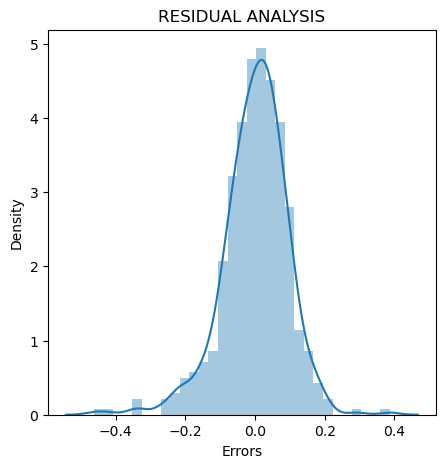

In [251]:
plt.figure(figsize=[5,5])
sns.distplot(res, kde=True)
plt.xlabel("Errors")
plt.title("RESIDUAL ANALYSIS")


In [253]:
### We can clearly see that the error terms are centred around 0 and follows a normal distribution, this is in accordance with the stated assumptions of linear regression.

##### HOMOESCEDASTICITY

* Homoscedasticity means that the variance of the errors (residuals) is constant across all levels of the independent variable(s). In other words, the spread of the residuals should be roughly the same for both small and large values of the predictor variable.

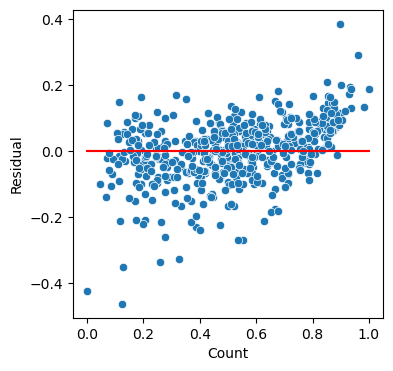

In [283]:
plt.figure(figsize=[4,4])
y_train_pred = lr_3.predict(X_train_sm3)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()
# y_train - y_train is always 0, so it creates a line at y = 0, which represents the baseline where residuals should ideally be centered 

* No visible pattern.

#### Making prediction using the final model

In [255]:
col1=X_train_new.columns
col1

Index(['temp', 'season_spring', 'season_winter', 'yr_2018', 'mnth_Dec',
       'mnth_Jan', 'mnth_July', 'mnth_Nov', 'mnth_Sep', 'holiday_Yes',
       'weathersit_Light snow', 'weathersit_Mist'],
      dtype='object')

In [257]:
X_test = X_test[col1]
# Adding constant variable to test dataframe
X_test_sm= sm.add_constant(X_test)

In [259]:
X_train_sm3

,const,temp,season_spring,season_winter,yr_2018,mnth_Dec,mnth_Jan,mnth_July,mnth_Nov,mnth_Sep,holiday_Yes,weathersit_Light snow,weathersit_Mist
576,1.0,0.815169,0,0,0,0,0,1,0,0,0,0,0
426,1.0,0.442393,1,0,0,0,0,0,0,0,0,0,1
728,1.0,0.245101,1,0,0,1,0,0,0,0,0,0,0
482,1.0,0.395666,0,0,0,0,0,0,0,0,0,0,1
111,1.0,0.345824,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0.863973,0,0,0,0,0,0,0,0,0,0,0
53,1.0,0.202618,1,0,1,0,0,0,0,0,0,0,0
350,1.0,0.248216,0,1,1,1,0,0,0,0,0,0,1
79,1.0,0.462664,0,0,1,0,0,0,0,0,0,0,1


In [261]:
X_test_sm

,const,temp,season_spring,season_winter,yr_2018,mnth_Dec,mnth_Jan,mnth_July,mnth_Nov,mnth_Sep,holiday_Yes,weathersit_Light snow,weathersit_Mist
184,1.0,0.831783,0,0,1,0,0,1,0,0,1,0,1
535,1.0,0.901354,0,0,0,0,0,0,0,0,0,0,0
299,1.0,0.511964,0,1,1,0,0,0,0,0,0,0,1
221,1.0,0.881625,0,0,1,0,0,0,0,0,0,0,0
152,1.0,0.817246,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,0.519232,0,1,0,1,0,0,0,0,0,0,0
127,1.0,0.584649,0,0,1,0,0,0,0,0,0,0,0
640,1.0,0.745598,0,1,0,0,0,0,0,0,0,0,1
72,1.0,0.331557,1,0,1,0,0,0,0,0,0,0,0


In [263]:
print(X_train_sm3.columns) #verifying alignment

Index(['const', 'temp', 'season_spring', 'season_winter', 'yr_2018',
       'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_Nov', 'mnth_Sep',
       'holiday_Yes', 'weathersit_Light snow', 'weathersit_Mist'],
      dtype='object')


In [265]:
print(X_test_sm.columns)

Index(['const', 'temp', 'season_spring', 'season_winter', 'yr_2018',
       'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_Nov', 'mnth_Sep',
       'holiday_Yes', 'weathersit_Light snow', 'weathersit_Mist'],
      dtype='object')


In [267]:
y_test_pred=lr_3.predict(X_test_sm)

In [269]:
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.8213566850206256

##### the r2_score is 0.821, it means that 82.1% of the variance in the dependent variable can be explained by the model, indicating a strong fit.

In [272]:
mse=mean_squared_error(y_true=y_test,y_pred=y_test_pred)
mse

0.008541701394563847

In [286]:
mse=mean_squared_error(y_true=y_train,y_pred=y_train_pred)
mse

0.00877738598658651

##### mse of 0.008541701394563847 suggests that the model's predictions are quite close to the actual values

##### MODEL EVALUTAION

Text(0, 0.5, 'y_test_pred')

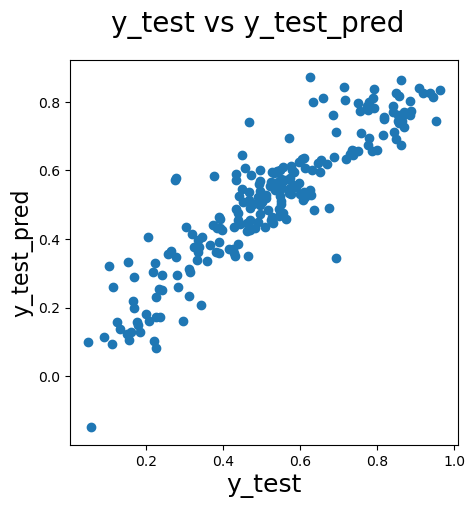

In [276]:
# Plotting y_test and y_test_pred to understand the spread
fig = plt.figure(figsize=[5,5])
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16) 

In [278]:
round(lr_3.params,4)

const                    0.4533
temp                     0.4335
season_spring           -0.1084
season_winter            0.0710
yr_2018                 -0.2337
mnth_Dec                -0.0387
mnth_Jan                -0.0381
mnth_July               -0.0624
mnth_Nov                -0.0472
mnth_Sep                 0.0621
holiday_Yes             -0.0935
weathersit_Light snow   -0.3073
weathersit_Mist         -0.0784
dtype: float64

the equation of our best fitted line
* cnt = 0.4533+ 0.4335*temp-0.1084 * season_spring+0.0710*season_winter -0.2337*yr_2018 --0.0387*MNTH_Dec-0.03810*mnth_Jan-0.0624 * mnth_July-0.0472*mnth_Nov + 0.0621 mnth_Sep-0.0935 *holiday_Yes-0.3073*weathersit_Light snow-0.0784*weathersit_Mist

#### INFERENCES:
* temp, the winter season, mnth_Sep, and holidays  are positively associated with the cnt (count of bikes rented).
*  Higher spring season, the year 2018, December, January, July, November, light snow, and misty weather are negatively associated with cnt.

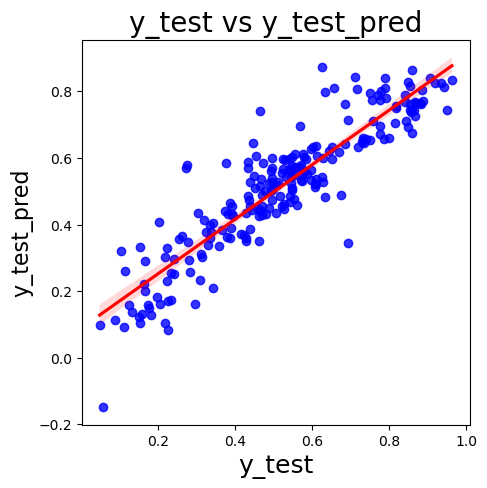

In [280]:
### Creating a regression plot to visualize the relationship between actual values (y_test) and predicted values (y_test_pred):
plt.figure(figsize=[5,5])
sns.regplot(x=y_test, y=y_test_pred, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

##### CONCLUSION
* All the points are scattered around the regression line, it suggests that the model is a good fit for the data, with the predicted values being close to the actual values.